In [6]:
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [7]:
library("DT")

In [8]:
cases <- read_csv("COVID-19_cases_plus_census.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  county_fips_code = col_character(),
  county_name = col_character(),
  state = col_character(),
  state_fips_code = col_character(),
  date = col_date(format = ""),
  geo_id = col_character(),
  pop_5_years_over = col_logical(),
  speak_only_english_at_home = col_logical(),
  speak_spanish_at_home = col_logical(),
  speak_spanish_at_home_low_english = col_logical(),
  pop_15_and_over = col_logical(),
  pop_never_married = col_logical(),
  pop_now_married = col_logical(),
  pop_separated = col_logical(),
  pop_widowed = col_logical(),
  pop_divorced = col_logical()
)
See spec(...) for full column specifications.


In [9]:
cases <- cases %>% mutate_if(is.character, factor)
dim(cases)

[1] 3142  259

In [10]:
cases <- cases %>% filter(confirmed_cases > 0) 

cases <- cases %>% 
  arrange(desc(confirmed_cases)) #%>%    
  #select(county_name, state, confirmed_cases, deaths, total_pop, median_income, median_age)
cases <- cases %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases)

cases

county_fips_code,county_name,state,state_fips_code,date,confirmed_cases,deaths,geo_id,nonfamily_households,family_households,...,pop_15_and_over,pop_never_married,pop_now_married,pop_separated,pop_widowed,pop_divorced,do_date,cases_per_1000,deaths_per_1000,death_per_case
06037,Los Angeles County,CA,06,2021-01-19,1002614,13936,06037,1091276,2203922,...,NA,NA,NA,NA,NA,NA,20132017,99.21251,1.3790207,0.013899666
17031,Cook County,IL,17,2021-01-19,435888,8544,17031,773610,1182951,...,NA,NA,NA,NA,NA,NA,20132017,83.20790,1.6309885,0.019601365
04013,Maricopa County,AZ,04,2021-01-19,425844,6443,04013,513279,976254,...,NA,NA,NA,NA,NA,NA,20132017,102.47717,1.5504749,0.015129954
12086,Miami-Dade County,FL,12,2021-01-19,347965,4622,12086,272813,585476,...,NA,NA,NA,NA,NA,NA,20132017,128.75185,1.7102037,0.013282945
48201,Harris County,TX,48,2021-01-19,286356,3825,48201,496164,1066649,...,NA,NA,NA,NA,NA,NA,20132017,63.27584,0.8452069,0.013357499
06071,San Bernardino County,CA,06,2021-01-19,252808,1560,06071,149939,473703,...,NA,NA,NA,NA,NA,NA,20132017,119.18047,0.7354258,0.006170691
06065,Riverside County,CA,06,2021-01-19,244151,2517,06065,189392,522332,...,NA,NA,NA,NA,NA,NA,20132017,103.67337,1.0687889,0.010309194
48113,Dallas County,TX,48,2021-01-19,234625,2453,48113,315704,590475,...,NA,NA,NA,NA,NA,NA,20132017,91.93002,0.9611267,0.010454981
06073,San Diego County,CA,06,2021-01-19,214335,2103,06073,364494,747245,...,NA,NA,NA,NA,NA,NA,20132017,65.27310,0.6404429,0.009811743
06059,Orange County,CA,06,2021-01-19,213866,2367,06059,285924,739052,...,NA,NA,NA,NA,NA,NA,20132017,67.76884,0.7500437,0.011067678


In [11]:
cases_sel <- cases %>% select(county_name, state, cases_per_1000, deaths_per_1000, 
    death_per_case, total_pop, white_pop, black_pop, asian_pop, hispanic_pop, 
    amerindian_pop, median_age, male_pop, female_pop, median_income,
    income_per_capita, median_rent, poverty, commuters_by_public_transportation, percent_income_spent_on_rent, 
    income_less_10000, income_10000_14999, income_15000_19999, income_20000_24999,
    income_25000_29999, income_30000_34999, income_35000_39999,income_40000_44999,
    income_45000_49999, income_50000_59999, income_60000_74999, income_75000_99999,
    income_100000_124999, income_125000_149999, income_150000_199999, income_200000_or_more)

# normalize by population 
cases_sel <- cases_sel %>% mutate(
    white_pop = white_pop / total_pop, 
    black_pop = black_pop / total_pop, 
    asian_pop = asian_pop / total_pop, 
    hispanic_pop = hispanic_pop / total_pop, 
    amerindian_pop = amerindian_pop / total_pop,
    male_pop = male_pop / total_pop,
    female_pop = female_pop / total_pop,
    commuters_by_public_transportation = commuters_by_public_transportation/ total_pop,
    income_less_10000 = income_less_10000/total_pop, 
    income_10000_14999 = income_10000_14999/total_pop,
    income_15000_19999 = income_15000_19999/total_pop,
    income_20000_24999 = income_20000_24999/total_pop,
    income_25000_29999 = income_25000_29999/total_pop, 
    income_30000_34999 = income_30000_34999/total_pop, 
    income_35000_39999 = income_35000_39999/total_pop,
    income_40000_44999 = income_40000_44999/total_pop,
    income_45000_49999 = income_45000_49999/total_pop,
    income_50000_59999 = income_50000_59999/total_pop,
    income_60000_74999 = income_60000_74999/total_pop,
    income_75000_99999 = income_75000_99999/total_pop,
    income_100000_124999 = income_100000_124999/total_pop,
    income_125000_149999 = income_125000_149999/total_pop,
    income_150000_199999 = income_150000_199999/total_pop,
    income_200000_or_more = income_200000_or_more/total_pop)

cases_sel

county_name,state,cases_per_1000,deaths_per_1000,death_per_case,total_pop,white_pop,black_pop,asian_pop,hispanic_pop,...,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more
Los Angeles County,CA,99.21251,1.3790207,0.013899666,10105722,0.26489765,0.07912141,0.14274853,0.48423843,...,0.013453170,0.013746371,0.011926807,0.02310938,0.03031461,0.03834481,0.02847743,0.01876343,0.022173379,0.027443363
Cook County,IL,83.20790,1.6309885,0.019601365,5238541,0.42675966,0.23406021,0.06931014,0.25050945,...,0.015327932,0.015820817,0.013279652,0.02668415,0.03477018,0.04478747,0.03223149,0.02094992,0.024055362,0.028694822
Maricopa County,AZ,102.47717,1.5504749,0.015129954,4155501,0.56313426,0.05083093,0.03860882,0.30603915,...,0.016620860,0.017634937,0.014853323,0.02970232,0.03683022,0.04514570,0.03220189,0.01956972,0.020561660,0.021261215
Miami-Dade County,FL,128.75185,1.7102037,0.013282945,2702602,0.13736133,0.16339957,0.01512172,0.67454919,...,0.015306360,0.015145034,0.013498103,0.02340263,0.02864869,0.03254382,0.02160881,0.01247020,0.013415220,0.017090937
Harris County,TX,63.27584,0.8452069,0.013357499,4525519,0.30639049,0.18523511,0.06786161,0.42216926,...,0.015562193,0.016178476,0.013463207,0.02704441,0.03371260,0.03932831,0.02905015,0.01837071,0.020521845,0.026969724
San Bernardino County,CA,119.18047,0.7354258,0.006170691,2121220,0.29820434,0.07966406,0.06732069,0.52281046,...,0.013010909,0.013846749,0.011797928,0.02390417,0.03128954,0.03778345,0.02716126,0.01566834,0.017257993,0.012149612
Riverside County,CA,103.67337,1.0687889,0.010309194,2355002,0.36571986,0.05979188,0.06108487,0.47984375,...,0.013450519,0.013493407,0.011687464,0.02276304,0.03105985,0.03919445,0.02869976,0.01834266,0.019700620,0.016120581
Dallas County,TX,91.93002,0.9611267,0.010454981,2552213,0.30219186,0.22067907,0.05957379,0.39627335,...,0.017471504,0.018230453,0.015049684,0.02979493,0.03604049,0.04053267,0.02747145,0.01591364,0.017980082,0.022594117
San Diego County,CA,65.27310,0.6404429,0.009811743,3283665,0.46203038,0.04708123,0.11470994,0.33360833,...,0.012889865,0.013572639,0.012009142,0.02451255,0.03252311,0.04358940,0.03449743,0.02300235,0.027648375,0.031637819
Orange County,CA,67.76884,0.7500437,0.011067678,3155816,0.41396520,0.01570434,0.19508710,0.34196290,...,0.010343442,0.010962616,0.010587119,0.02133299,0.02961833,0.04198312,0.03392815,0.02456259,0.031801917,0.042175463


In [12]:
table(complete.cases(cases_sel))


FALSE  TRUE 
    2  3137 

In [13]:
str(cases_sel)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	3139 obs. of  36 variables:
 $ county_name                       : Factor w/ 1878 levels "Abbeville County",..: 1003 399 1043 1106 737 1476 1429 447 1477 1249 ...
 $ state                             : Factor w/ 51 levels "AK","AL","AR",..: 5 15 4 10 44 5 5 44 5 5 ...
 $ cases_per_1000                    : num  99.2 83.2 102.5 128.8 63.3 ...
 $ deaths_per_1000                   : num  1.379 1.631 1.55 1.71 0.845 ...
 $ death_per_case                    : num  0.0139 0.0196 0.0151 0.0133 0.0134 ...
 $ total_pop                         : num  10105722 5238541 4155501 2702602 4525519 ...
 $ white_pop                         : num  0.265 0.427 0.563 0.137 0.306 ...
 $ black_pop                         : num  0.0791 0.2341 0.0508 0.1634 0.1852 ...
 $ asian_pop                         : num  0.1427 0.0693 0.0386 0.0151 0.0679 ...
 $ hispanic_pop                      : num  0.484 0.251 0.306 0.675 0.422 ...
 $ amerindian_pop            

In [14]:
library(seriation)
cm <- cor(cases_sel %>% select_if(is.numeric) %>% na.omit)

Warning message:
"package 'seriation' was built under R version 3.6.3"

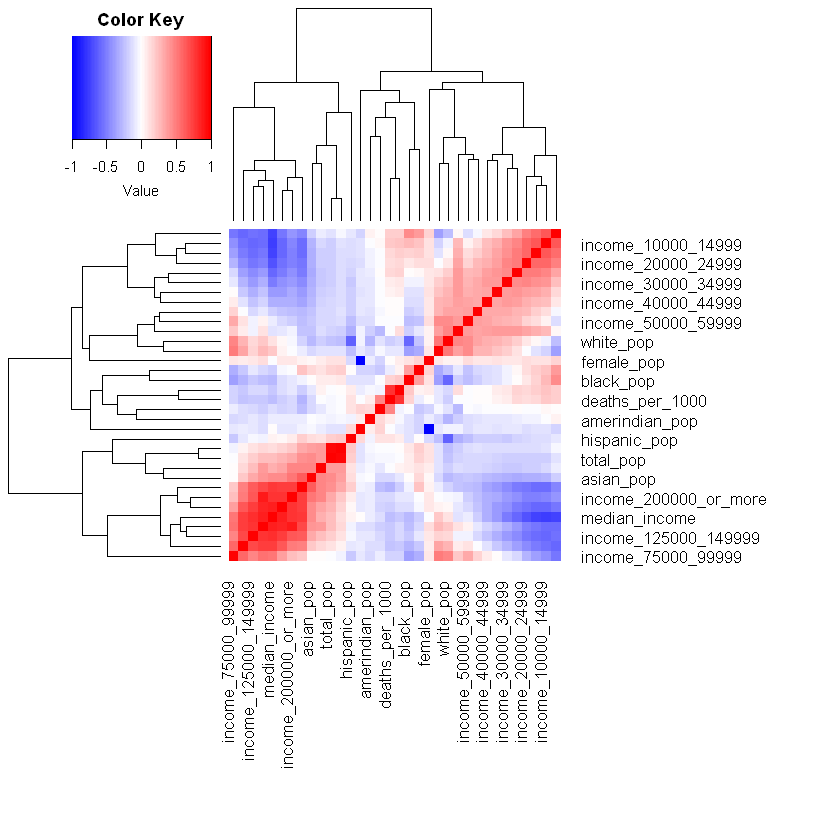

In [15]:
hmap(cm, margins = c(14,14))

In [16]:
summary(cases_sel$deaths_per_1000)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.6822  1.1901  1.3368  1.7520  8.3587 

In [17]:
mean = mean(cases_sel$deaths_per_1000)
cases_sel <- cases_sel %>% mutate(bad = as.factor(deaths_per_1000 > mean))

In [18]:
cases_sel %>% pull(bad) %>% table()

.
FALSE  TRUE 
 1806  1333 

In [19]:
cases_sel %>% group_by(state) %>% 
  summarize(bad_pct = sum(bad == TRUE)/n()) %>%
  arrange(desc(bad_pct))

state,bad_pct
NJ,0.95238095
MS,0.90243902
AZ,0.86666667
LA,0.85937500
MA,0.85714286
SD,0.69696970
ND,0.67924528
IA,0.67676768
AL,0.67164179
TX,0.66535433


In [20]:
cases_train <- cases_sel %>% filter(!(state %in% c("CA", "FL", "Tx")))
cases_train %>% pull(bad) %>% table()

.
FALSE  TRUE 
 1716  1298 

In [21]:
cases_test <-  cases_sel %>% filter((state %in% c("CA", "FL", "TX")))
cases_test %>% pull(bad) %>% table()

.
FALSE  TRUE 
  175   204 

In [22]:
counties <- as_tibble(map_data("county")) %>%
  rename(county = subregion, state = region) %>%
  mutate(state = state.abb[match(tolower(state), tolower(state.name))]) %>%
  select(state, county, long, lat, group)
counties


Attaching package: 'maps'

The following object is masked from 'package:purrr':

    map



state,county,long,lat,group
AL,autauga,-86.50517,32.34920,1
AL,autauga,-86.53382,32.35493,1
AL,autauga,-86.54527,32.36639,1
AL,autauga,-86.55673,32.37785,1
AL,autauga,-86.57966,32.38357,1
AL,autauga,-86.59111,32.37785,1
AL,autauga,-86.61403,32.38931,1
AL,autauga,-86.61976,32.40649,1
AL,autauga,-86.62549,32.41795,1
AL,autauga,-86.63695,32.41795,1


In [23]:
counties_all <- counties %>% left_join(cases_train %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining, by = c("state", "county")
Warning message:
"Column `state` joining character vector and factor, coercing into character vector"

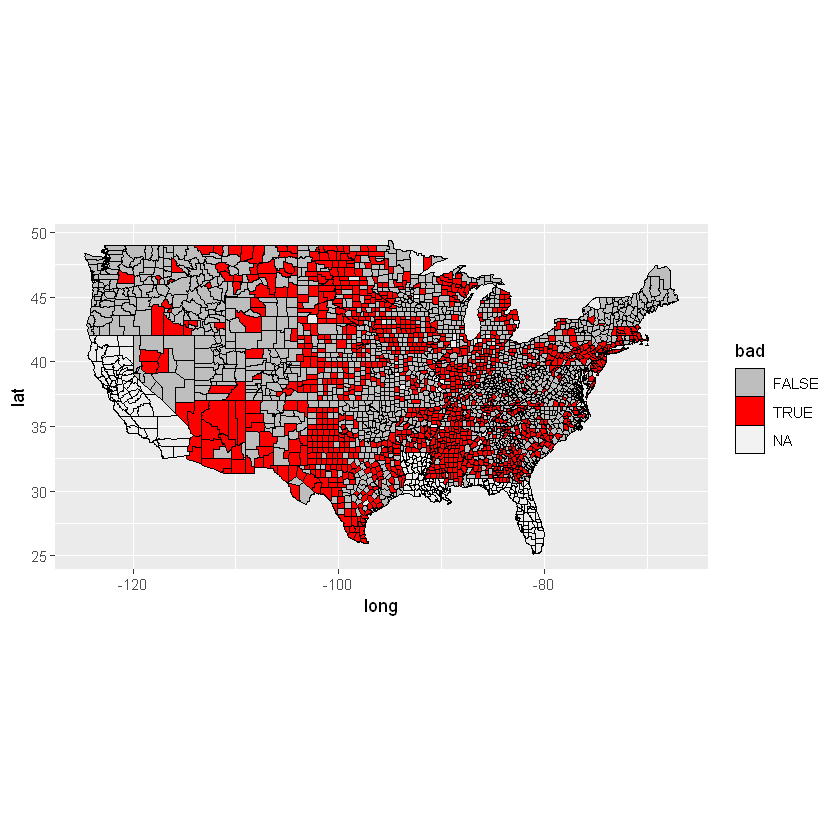

In [24]:
ggplot(counties_all, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
    coord_quickmap() + scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

In [25]:
library(FSelector)
cases_train %>%  chi.squared(bad ~ ., data = .) %>% 
  arrange(desc(attr_importance)) %>% head()

Warning message:
"package 'FSelector' was built under R version 3.6.3"

attr_importance
1.0000000
0.7760140
0.7201159
0.4777479
0.3718960
0.2836490


In [26]:
cases_train <- cases_train %>% select(-c(deaths_per_1000))
cases_train %>%  chi.squared(bad ~ ., data = .) %>% 
  arrange(desc(attr_importance)) %>% head()
dim(cases_train)

attr_importance
0.7760140
0.7201159
0.4777479
0.3718960
0.2836490
0.2442140


[1] 3014   36

In [27]:
cases_train <- cases_train %>% select(-death_per_case, -cases_per_1000)

cases_train %>%  chi.squared(bad ~ ., data = .) %>% 
  arrange(desc(attr_importance)) %>% head(n = 10)

attr_importance
0.7760140
0.4777479
0.2836490
0.2442140
0.2221548
0.2211844
0.2193278
0.2149845
0.2087777
0.2065224


In [31]:
library(caret)

Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:seriation':

    panel.lines


Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [109]:
cases_train <- cases_train %>% na.omit
fit <- cases_train %>%
  train(bad ~ . - county_name - state,
    data = . ,
    #method = "rpart",
    method = "rf",
    #method = "nb",
    trControl = trainControl(method = "cv", number = 10)
    )
fit

Random Forest 

3012 samples
  33 predictor
   2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2710, 2711, 2711, 2711, 2710, 2712, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.6819061  0.3331640
  16    0.6832472  0.3425283
  31    0.6825926  0.3409243

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 16.

In [110]:
#library(rpart.plot)
#rpart.plot(fit$finalModel, extra = 2)

varImp(fit)

rf variable importance

  only 20 most important variables shown (out of 31)

                             Overall
median_rent                  100.000
white_pop                     47.726
hispanic_pop                  35.190
black_pop                     30.822
amerindian_pop                24.740
median_age                    18.765
income_50000_59999            12.661
income_10000_14999             9.670
income_40000_44999             9.357
income_less_10000              8.565
income_75000_99999             8.563
percent_income_spent_on_rent   8.354
total_pop                      7.389
income_150000_199999           7.269
asian_pop                      6.690
income_60000_74999             6.567
income_100000_124999           5.693
income_200000_or_more          4.454
income_125000_149999           3.813
female_pop                     3.660

In [111]:
cases_test <- cases_test %>% na.omit

In [112]:
cases_test$bad_predicted <- predict(fit, cases_test)

In [113]:
counties_test <- counties %>% left_join(cases_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining, by = c("state", "county")
Warning message:
"Column `state` joining character vector and factor, coercing into character vector"

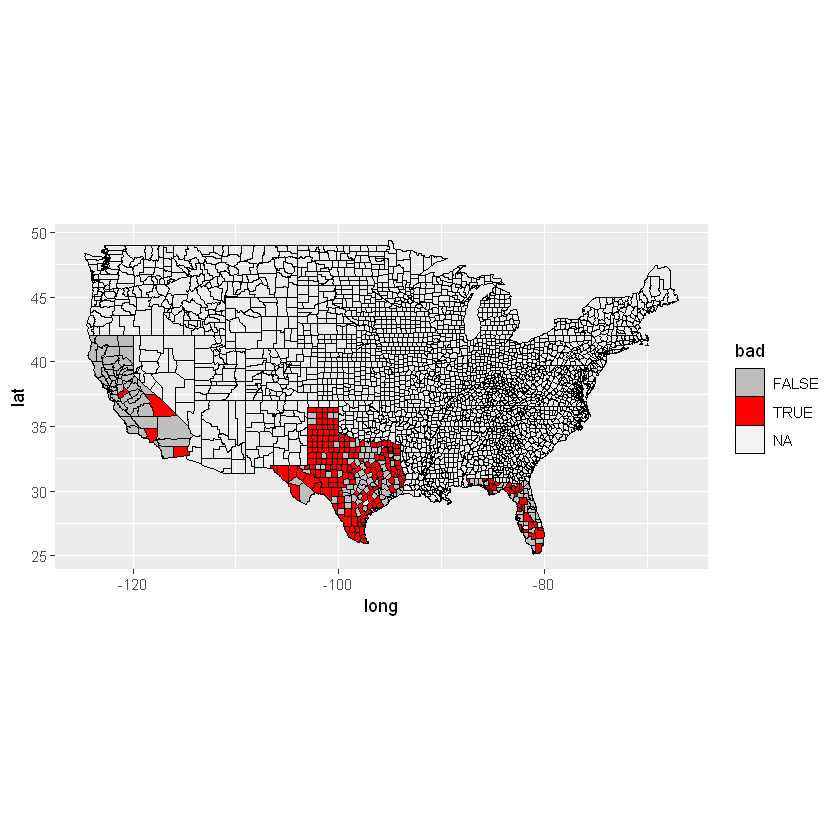

In [115]:
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

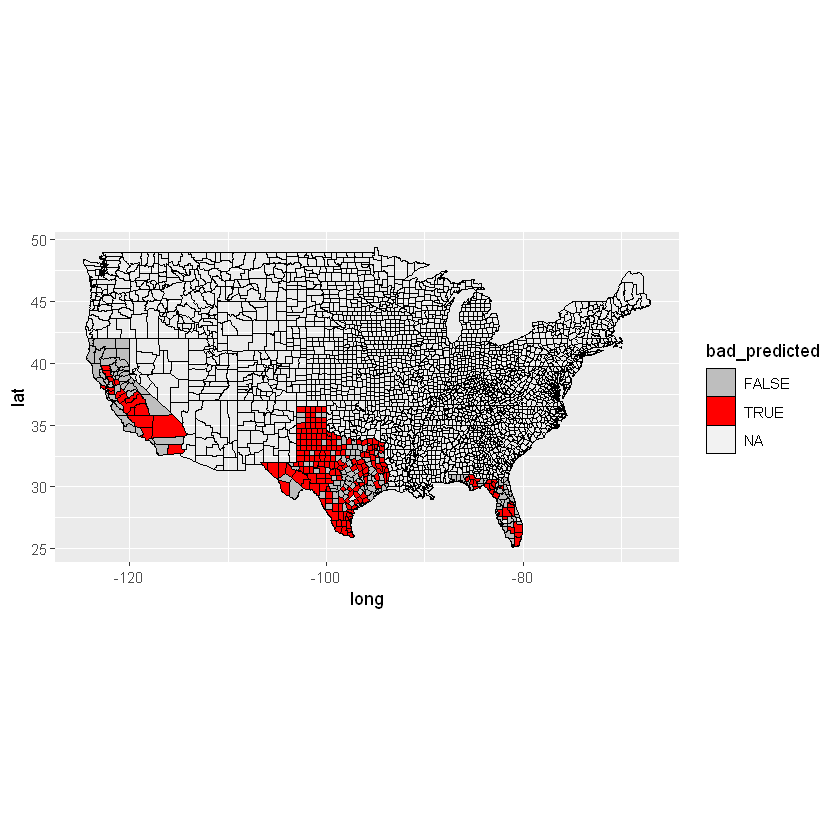

In [116]:
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad_predicted), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

In [114]:
confusionMatrix(data = cases_test$bad_predicted, ref = cases_test$bad)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   148   17
     TRUE     27  187
                                          
               Accuracy : 0.8839          
                 95% CI : (0.8473, 0.9144)
    No Information Rate : 0.5383          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7655          
                                          
 Mcnemar's Test P-Value : 0.1748          
                                          
            Sensitivity : 0.8457          
            Specificity : 0.9167          
         Pos Pred Value : 0.8970          
         Neg Pred Value : 0.8738          
             Prevalence : 0.4617          
         Detection Rate : 0.3905          
   Detection Prevalence : 0.4354          
      Balanced Accuracy : 0.8812          
                                          
       'Positive' Class : FALSE           
                     

In [118]:
hyperparams <- expand.grid(cp = seq(0.01, 0.1, 0.01))

# Train the model using 10-fold cross-validation and hyperparameter tuning
fit <- train(bad ~ . - county_name - state,
             data = cases_train,
             method = "rpart",
             trControl = trainControl(method = "cv", number = 10),
             tuneGrid = hyperparams)

# Print the best hyperparameters and the corresponding accuracy
fit

CART 

3012 samples
  33 predictor
   2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 2710, 2711, 2711, 2711, 2711, 2710, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa    
  0.01  0.6517330  0.2808802
  0.02  0.6460895  0.2262021
  0.03  0.6454273  0.2239009
  0.04  0.6454273  0.2231114
  0.05  0.6454273  0.2231114
  0.06  0.6414406  0.2105026
  0.07  0.6414406  0.2105026
  0.08  0.6341073  0.2316473
  0.09  0.5986042  0.1777073
  0.10  0.5690569  0.0000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01.

In [119]:
cases_test$bad_predicted <- predict(fit, cases_test)

In [120]:
varImp(fit)

rpart variable importance

  only 20 most important variables shown (out of 31)

                             Overall
median_rent                  100.000
white_pop                     84.238
black_pop                     48.720
income_150000_199999          46.382
income_100000_124999          40.907
income_125000_149999          40.737
income_200000_or_more         21.321
hispanic_pop                  18.867
income_less_10000             14.904
income_75000_99999            12.389
median_income                 12.082
income_60000_74999            11.998
income_per_capita             10.959
percent_income_spent_on_rent   7.648
income_50000_59999             6.623
total_pop                      2.860
median_age                     2.513
asian_pop                      0.000
income_25000_29999             0.000
income_40000_44999             0.000

In [121]:
counties_test <- counties %>% left_join(cases_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining, by = c("state", "county")
Warning message:
"Column `state` joining character vector and factor, coercing into character vector"

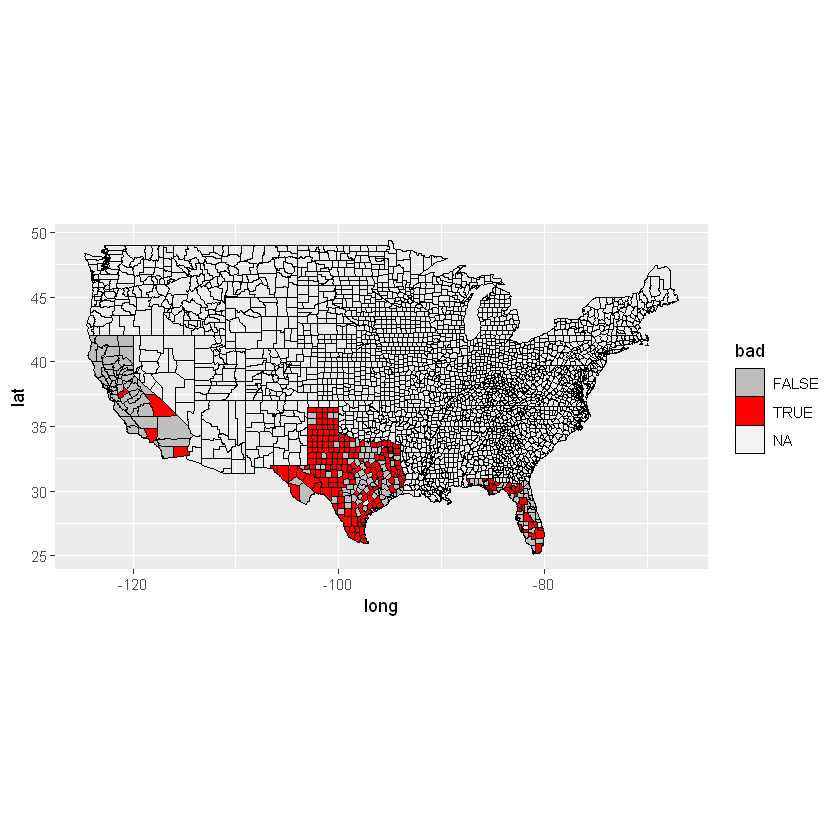

In [122]:
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

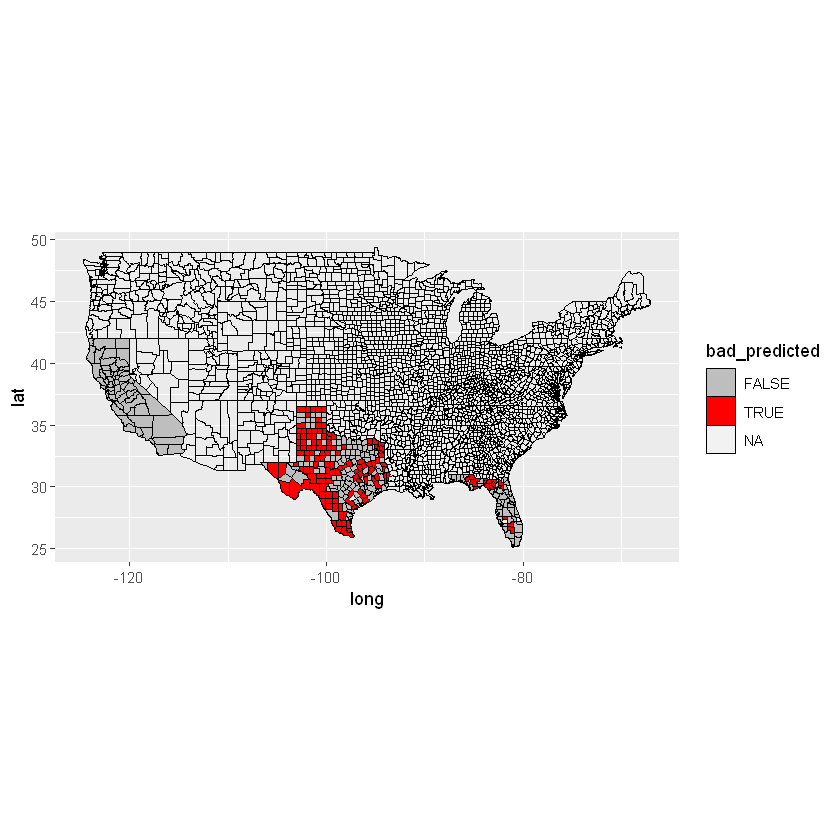

In [123]:
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad_predicted), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

In [124]:
confusionMatrix(data = cases_test$bad_predicted, ref = cases_test$bad)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   148   83
     TRUE     27  121
                                         
               Accuracy : 0.7098         
                 95% CI : (0.6612, 0.755)
    No Information Rate : 0.5383         
    P-Value [Acc > NIR] : 6.279e-12      
                                         
                  Kappa : 0.4291         
                                         
 Mcnemar's Test P-Value : 1.571e-07      
                                         
            Sensitivity : 0.8457         
            Specificity : 0.5931         
         Pos Pred Value : 0.6407         
         Neg Pred Value : 0.8176         
             Prevalence : 0.4617         
         Detection Rate : 0.3905         
   Detection Prevalence : 0.6095         
      Balanced Accuracy : 0.7194         
                                         
       'Positive' Class : FALSE          
                                         

In [ ]:
fit <- cases_train %>%
  train(bad ~ . - county_name - state,
    data = . ,
    method = "glm",
    trControl = trainControl(method = "cv", number = 10)
    )
fit

In [191]:
cases_test$bad_predicted <- predict(fit, cases_test)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [192]:
varImp(fit)

glm variable importance

  only 20 most important variables shown (out of 30)

                                   Overall
hispanic_pop                        100.00
black_pop                            98.25
median_rent                          94.39
white_pop                            89.46
amerindian_pop                       88.86
asian_pop                            58.72
commuters_by_public_transportation   48.57
total_pop                            48.49
poverty                              44.99
income_200000_or_more                31.10
male_pop                             24.73
median_income                        23.94
income_60000_74999                   23.21
income_75000_99999                   22.21
income_40000_44999                   20.98
income_150000_199999                 20.75
income_50000_59999                   18.68
income_15000_19999                   15.31
income_less_10000                    13.50
income_25000_29999                   12.66

In [193]:
counties_test <- counties %>% left_join(cases_test %>% 
    mutate(county = county_name %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining, by = c("state", "county")
Warning message:
"Column `state` joining character vector and factor, coercing into character vector"

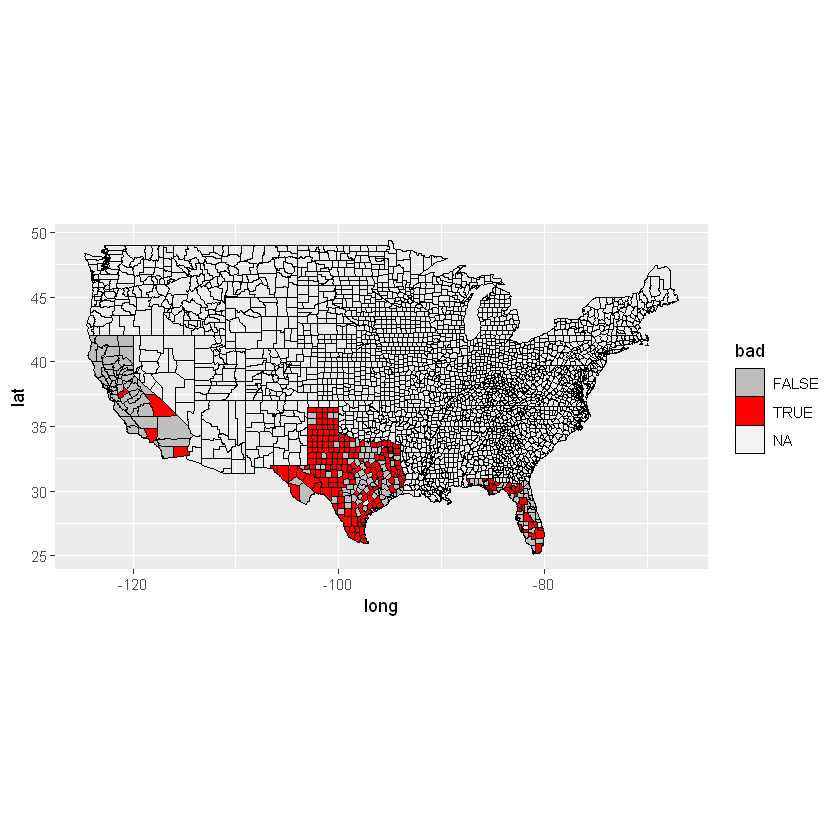

In [194]:
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

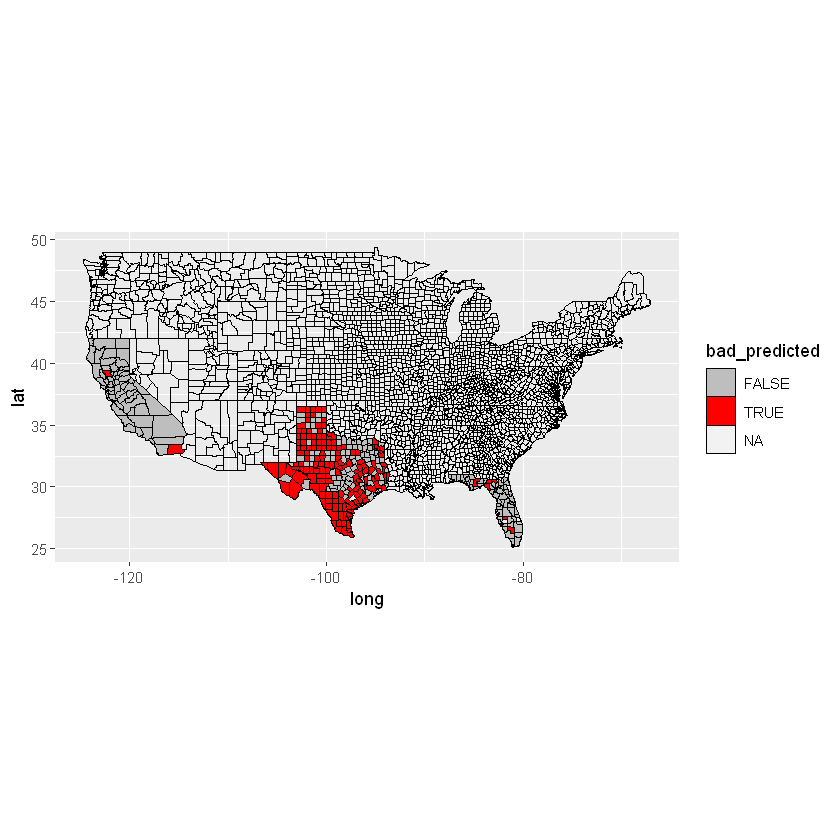

In [195]:
ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad_predicted), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey'))

In [196]:
confusionMatrix(data = cases_test$bad_predicted, ref = cases_test$bad)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   143   67
     TRUE     32  137
                                          
               Accuracy : 0.7388          
                 95% CI : (0.6915, 0.7823)
    No Information Rate : 0.5383          
    P-Value [Acc > NIR] : 7.593e-16       
                                          
                  Kappa : 0.4819          
                                          
 Mcnemar's Test P-Value : 0.0006329       
                                          
            Sensitivity : 0.8171          
            Specificity : 0.6716          
         Pos Pred Value : 0.6810          
         Neg Pred Value : 0.8107          
             Prevalence : 0.4617          
         Detection Rate : 0.3773          
   Detection Prevalence : 0.5541          
      Balanced Accuracy : 0.7444          
                                          
       'Positive' Class : FALSE           
                     

In [2]:
library(keras)

Warning message:
"package 'keras' was built under R version 3.6.3"

In [57]:
train_indices <- createDataPartition(y = cases_sel$bad, p = 0.8, list = FALSE)
train_data <- cases_sel[train_indices, ]
test_data <- cases_sel[-train_indices, ]

predictor_cols <- c("cases_per_1000", "deaths_per_1000", 
    "death_per_case", "total_pop", "white_pop", "black_pop", "asian_pop", "hispanic_pop", 
    "amerindian_pop", "median_age", "male_pop", "female_pop", "median_income",
    "income_per_capita", "median_rent", "poverty", "commuters_by_public_transportation", "percent_income_spent_on_rent", 
    "income_less_10000", "income_10000_14999", "income_15000_19999", "income_20000_24999",
    "income_25000_29999", "income_30000_34999", "income_35000_39999", "income_40000_44999",
    "income_45000_49999", "income_50000_59999", "income_60000_74999", "income_75000_99999",
    "income_100000_124999", "income_125000_149999", "income_150000_199999", "income_200000_or_more")

# Split the data frames into x_train, x_test, y_train, and y_test
x_train <- train_data[, predictor_cols]
y_train <- train_data$bad
x_test <- test_data[, predictor_cols]
y_test <- test_data$bad
x_train <- as.matrix(x_train)
y_train <- as.matrix(y_train)
x_test <- as.matrix(x_test)
y_test <- as.matrix(y_test)
y_train <- ifelse(y_train, 1, 0)
y_test <- ifelse(y_test, 1, 0)
na_rows <- apply(is.na(x_train), 1, any)
x_train <- x_train[!na_rows, ]
y_train <- y_train[!na_rows]
x_test <- x_test %>% na.omit
y_test <- y_test %>% na.omit

In [101]:
model <- keras_model_sequential() %>%
  layer_dense(64, activation='relu', input_shape=c(34), kernel_initializer="glorot_uniform") %>%
  layer_dropout(0.2) %>%
#   layer_dense(128, activation='relu') %>%
  #layer_dropout(0.3) %>%
  layer_dense(64, activation='relu') %>%
  layer_batch_normalization() %>%
  #layer_dense(64, activation='relu') %>%
  layer_dropout(0.5) %>%
  layer_dense(32, activation='relu') %>%
  layer_batch_normalization() %>%
  layer_dense(32, activation='relu') %>%
  layer_dropout(0.5) %>%
  layer_dense(16, activation='relu') %>%
  layer_batch_normalization() %>%
  layer_dense(8, activation='relu') %>%
  layer_dense(1, activation='sigmoid')  

model %>% compile(
  loss = "binary_crossentropy",
  optimizer = optimizer_adam(lr = 0.001),
  metrics = c("accuracy")
)

model %>% fit(
  x_train, y_train,
  epochs = 50,
  batch_size = 32,
  validation_data = list(x_test, y_test),
)

In [102]:
y_pred <- predict(model, x_test)
y_pred

0.3080786
0.2998599
0.3133037
0.3198570
0.3247913
0.3469054
0.3110181
0.4019520
0.3210631
0.3641013
0.3972554


In [103]:
threshold <- 0.5
y_pred_prob <- predict(model, x_test)
y_pred <- ifelse(y_pred_prob >= threshold, 1, 0)

In [104]:
y_pred

0
0
0
0
0
0
0
0
0
0
0


In [105]:
metrics <- model %>% evaluate(x_test, y_test)
accuracy <- metrics["accuracy"]
print(accuracy)

 accuracy 
0.6044657 
